In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [9]:
y = np.random.randn(1000)

In [10]:
fft_y = np.fft.fft(y)

In [11]:
ifft_y = np.copy(fft_y)
ifft_y[450:-450] = 0

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


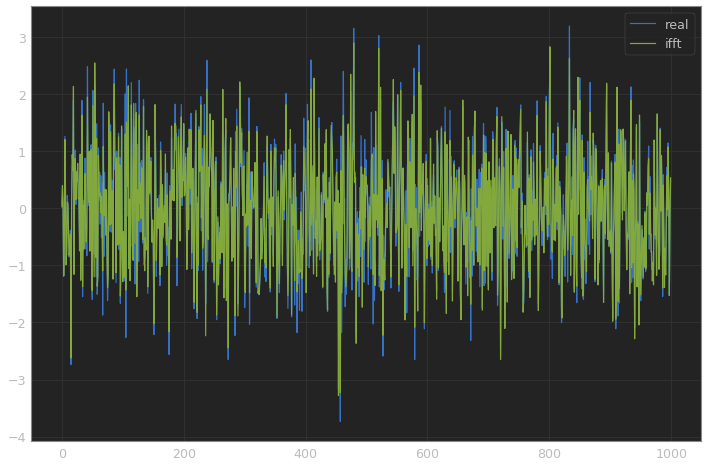

In [12]:
plt.plot(y, label="real")
plt.plot(np.fft.ifft(ifft_y), label="ifft")
plt.legend()

In [13]:
x = np.linspace(-3, 3, 300)
y = np.abs(x[:100]) - .5
y = np.concatenate((y, np.power(x[100:-100], 2) * .5))
y = np.concatenate((y, np.abs(x[-100:]) - .5))

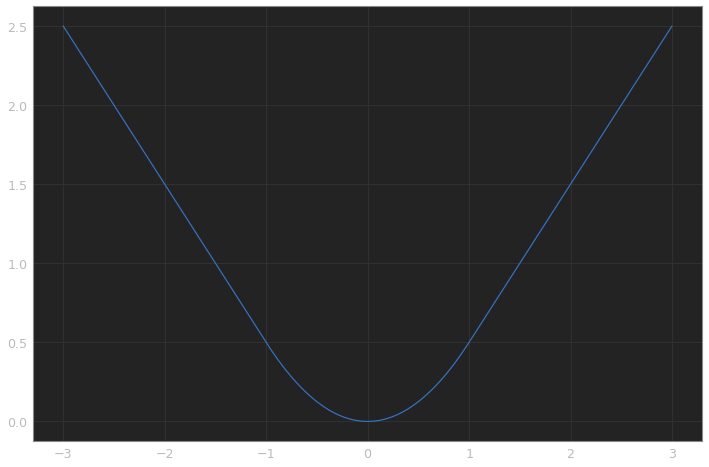

In [8]:
plt.plot(x, y)

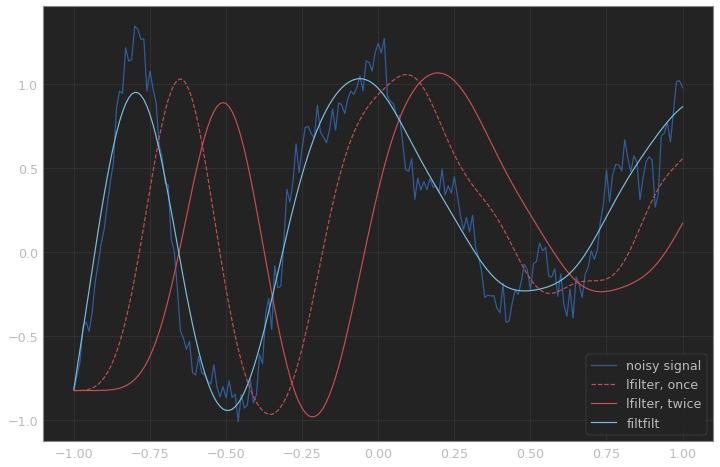

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b, a = signal.butter(3, 0.05, )

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y = signal.filtfilt(b, a, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'c')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

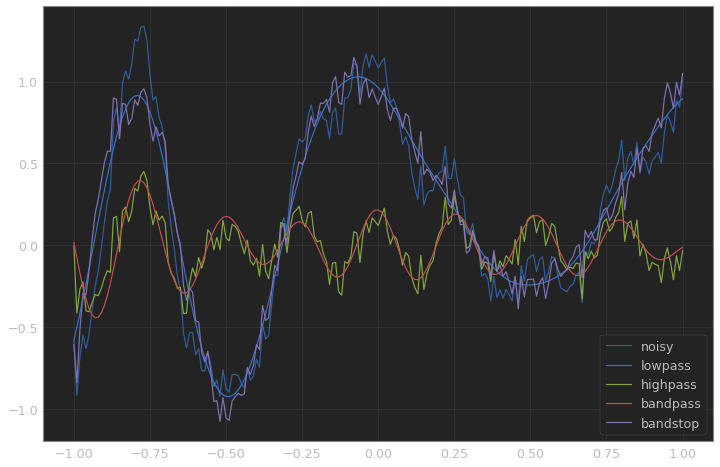

In [10]:
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b1, a1 = signal.butter(3, 0.05, btype='lowpass')
b2, a2 = signal.butter(3, 0.05, btype='highpass')
b3, a3 = signal.butter(3, [0.05, 0.1], btype='bandpass')
b4, a4 = signal.butter(3, [0.05, 0.1], btype='bandstop')

y1 = signal.filtfilt(b1, a1, xn)
y2 = signal.filtfilt(b2, a2, xn)
y3 = signal.filtfilt(b3, a3, xn)
y4 = signal.filtfilt(b4, a4, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, y1, 'r', t, y2, 'c', t, y3, 'y', t, y4, 'g')
plt.legend(('noisy', 'lowpass', 'highpass', 'bandpass', 'bandstop'), loc='best')
plt.grid(True)
plt.show()